<a href="https://colab.research.google.com/github/prasys/qrc-mlteamprojects/blob/jake/ML_Team_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=10K4Qe2NFZhqy0aWYaQz5050K-ycpUTco' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=10K4Qe2NFZhqy0aWYaQz5050K-ycpUTco" -O creditcard.csv && rm -rf /tmp/cookies.txt

--2023-11-26 20:10:04--  https://docs.google.com/uc?export=download&confirm=t&id=10K4Qe2NFZhqy0aWYaQz5050K-ycpUTco
Resolving docs.google.com (docs.google.com)... 142.251.163.113, 142.251.163.101, 142.251.163.100, ...
Connecting to docs.google.com (docs.google.com)|142.251.163.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-04-4c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ugn92rra1sddmtc5kekii1h9ol4u1i5i/1701029400000/17337244698426673086/*/10K4Qe2NFZhqy0aWYaQz5050K-ycpUTco?e=download&uuid=063f3bd7-af49-449c-869e-f5bca8df915f [following]
--2023-11-26 20:10:04--  https://doc-04-4c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ugn92rra1sddmtc5kekii1h9ol4u1i5i/1701029400000/17337244698426673086/*/10K4Qe2NFZhqy0aWYaQz5050K-ycpUTco?e=download&uuid=063f3bd7-af49-449c-869e-f5bca8df915f
Resolving doc-04-4c-docs.googleusercontent.com (doc-04-4c-docs.googleusercontent.com)... 172.253.122.

In [2]:
#Install AutoML libraries.

!pip install flaml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.2/295.2 kB 4.7 MB/s eta 0:00:00


In [3]:
!pip install pivotpal

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.4 MB/s eta 0:00:00


In [4]:
import pandas as pd

data = pd.read_csv("creditcard.csv")

data.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [5]:
data.tail(20)

Time         V1         V2        V3        V4        V5  \
284787  172769.0  -1.029719  -1.110670 -0.636179 -0.840816  2.424360   
284788  172770.0   2.007418  -0.280235 -0.208113  0.335261 -0.715798   
284789  172770.0  -0.446951   1.302212 -0.168583  0.981577  0.578957   
284790  172771.0  -0.515513   0.971950 -1.014580 -0.677037  0.912430   
284791  172774.0  -0.863506   0.874701  0.420358 -0.530365  0.356561   
284792  172774.0  -0.724123   1.485216 -1.132218 -0.607190  0.709499   
284793  172775.0   1.971002  -0.699067 -1.697541 -0.617643  1.718797   
284794  172777.0  -1.266580  -0.400461  0.956221 -0.723919  1.531993   
284795  172778.0 -12.516732  10.187818 -8.476671 -2.510473 -4.586669   
284796  172780.0   1.884849  -0.143540 -0.999943  1.506772 -0.035300   
284797  172782.0  -0.241923   0.712247  0.399806 -0.463406  0.244531   
284798  172782.0   0.219529   0.881246 -0.635891  0.960928 -0.152971   
284799  172783.0  -1.775135  -0.004235  1.189786  0.331096  1.196063   
284800  172784.0   2.039560  -0.175233 -1.196825  0.234580 -0.008713   
284801  172785.0   0.120316   0.931005 -0.546012 -0.745097  1.130314   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
284787 -2.956733  0.283610 -0.332656 -0.247488  ...  0.353722  0.488487   
284788 -0.751373 -0.458972 -0.140140  0.959971  ... -0.208260 -0.430347   
284789 -0.605641  1.253430 -1.042610 -0.417116  ...  0.851800  0.305268   
284790 -0.316187  0.396137  0.532364 -0.224606  ... -0.280302 -0.849919   
284791 -1.046238  0.757051  0.230473 -0.506856  ... -0.108846 -0.480820   
284792 -0.482638  0.548393  0.343003 -0.226323  ...  0.414621  1.307511   
284793  3.911336 -1.259306  1.056209  1.315006  ...  0.188758  0.694418   
284794 -1.788600  0.314741  0.004704  0.013857  ... -0.157831 -0.883365   
284795 -1.394465 -3.632516  5.498583  4.893089  ... -0.944759 -1.565026   
284796 -0.613638  0.190241 -0.249058  0.666458  ...  0.144008  0.634646   
284797 -1.343668  0.929369 -0.206210  0.106234  ... -0.228876 -0.514376   
284798 -1.014307  0.427126  0.121340 -0.285670  ...  0.099936  0.337120   
284799  5.519980 -1.518185  2.080825  1.159498  ...  0.103302  0.654850   
284800 -0.726571  0.017050 -0.118228  0.435402  ... -0.268048 -0.717211   
284801 -0.235973  0.812722  0.115093 -0.204064  ... -0.314205 -0.808520   
284802 -2.606837 -4.918215  7.305334  1.914428  ...  0.213454  0.111864   
284803  1.058415  0.024330  0.294869  0.584800  ...  0.214205  0.924384   
284804  3.031260 -0.296827  0.708417  0.432454  ...  0.232045  0.578229   
284805  0.623708 -0.686180  0.679145  0.392087  ...  0.265245  0.800049   
284806 -0.649617  1.577006 -0.414650  0.486180  ...  0.261057  0.643078   

             V23       V24       V25       V26       V27       V28  Amount  \
284787  0.293632  0.107812 -0.935586  1.138216  0.025271  0.255347    9.99   
284788  0.416765  0.064819 -0.608337  0.268436 -0.028069 -0.041367    3.99   
284789 -0.148093 -0.038712  0.010209 -0.362666  0.503092  0.229921   60.50   
284790  0.300245  0.000607 -0.376379  0.128660 -0.015205 -0.021486    9.81   
284791 -0.074513 -0.003988 -0.113149  0.280378 -0.077310  0.023079   20.32   
284792 -0.059545  0.242669 -0.665424 -0.269869 -0.170579 -0.030692    3.99   
284793  0.163002  0.726365 -0.058282 -0.191813  0.061858 -0.043716    4.99   
284794  0.088485 -0.076790 -0.095833  0.132720 -0.028468  0.126494    0.89   
284795  0.890675 -1.253276  1.786717  0.320763  2.090712  1.232864    9.87   
284796 -0.042114 -0.053206  0.316403 -0.461441  0.018265 -0.041068   60.00   
284797  0.279598  0.371441 -0.559238  0.113144  0.131507  0.08126

# **Credit Card Fraud**

---
## **Introduction**

---
## **Strategy**

---
# **Initial EDA**

In [6]:
import pivotpal as pp


---
# Pivot Pal Helper:
---
## Welcome to 'Pivot Pal' Helper!
To get detailed descriptions of specific functions, provide a keyword inside the parentheses.
Example: `pivot_pal.help('value')` will show functions related to value statistics.
---
### Available Functions:
- pp.distribution(df, "column_name")
- pp.range(df)
- pp.unique(df)
- pp.summarise(df)
- pp.missing(df)
- pp.zeros(df)
---
### Try searching with keywords like 'missing', 'value', 'duplicate', etc.


---
## **Dataset Overview**


In [7]:
pp.overview(data)

# Dataset Overview

## General Statistics:
- **Total Rows**: 284807
- **Total Columns**: 31
- **Most Frequent Data Type**: float64
- **Unique Data Types**: 2
- **Numeric Columns**: 31
- **Non-Numeric Columns**: 0

## Data Quality Insights

- There are 1081 duplicate rows in the dataset. Consider investigating or removing them.

- There are 3 columns with zero values. Use **pp.zeros(df)** to investigate further.

- There are 1 columns with binary values in the dataset.

## Recommendations
- Investigate columns with significant missing values to determine if they can be imputed or if the columns should be dropped.
- Check the columns with zero values to determine if zeros are valid or placeholders for missing data.
- For binary columns, ensure that the encoding is consistent and meaningful.


Description    Count
0                   Total Rows   284807
1                Total Columns       31
2  Columns with Missing Values        0
3         Total Duplicate Rows     1081
4      Most Frequent Data Type  float64
5   Columns with Binary Values        1
6     Columns with Zero Values        3
7            Unique Data Types        2
8              Numeric Columns       31
9          Non-Numeric Columns        0

---
## **Label Distribution**

### Looking at the table below, you can see we have a hugely imbalanced dataset
- (Due to this I have added a discussion on trello for a discussion)

In [8]:
pp.distribution(data, 'Class')

Class   count      %
0      0  284315  99.83
1      1     492   0.17

---
## **Missing Data**

The dataset has no missing data.

In [9]:
pp.missing(data)

Empty DataFrame
Columns: [Column Name, Missing Count, Missing %]
Index: []

---
## **Zero Values**

## `Class` (Our Label):

- ### `Class` has 99.83% 0 values (non fraudulent).

    - *This implies only 0.17% of transactions are classed as fraudulent.*
    - *How could this lead to challenges later on when building the model?*

In [10]:
pp.zeros(data)

Zero Count  Zero %
Class       284315   99.83
Amount        1825    0.64
Time             2    0.00

---
## **Range Data**


In [11]:
pp.range(data)

Min Value      Max Value
Time      0.000000  172792.000000
V1      -56.407510       2.454930
V2      -72.715728      22.057729
V3      -48.325589       9.382558
V4       -5.683171      16.875344
V5     -113.743307      34.801666
V6      -26.160506      73.301626
V7      -43.557242     120.589494
V8      -73.216718      20.007208
V9      -13.434066      15.594995
V10     -24.588262      23.745136
V11      -4.797473      12.018913
V12     -18.683715       7.848392
V13      -5.791881       7.126883
V14     -19.214325      10.526766
V15      -4.498945       8.877742
V16     -14.129855      17.315112
V17     -25.162799       9.253526
V18      -9.498746       5.041069
V19      -7.213527       5.591971
V20     -54.497720      39.420904
V21     -34.830382      27.202839
V22     -10.933144      10.503090
V23     -44.807735      22.528412
V24      -2.836627       4.584549
V25     -10.295397       7.519589
V26      -2.604551       3.517346
V27     -22.565679      31.612198
V28     -15.430084      33.847808
Amount    0.000000   25691.160000
Class     0.000000       1.000000

In [12]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Text(0.5, 1.0, 'Correlation Heatmap')

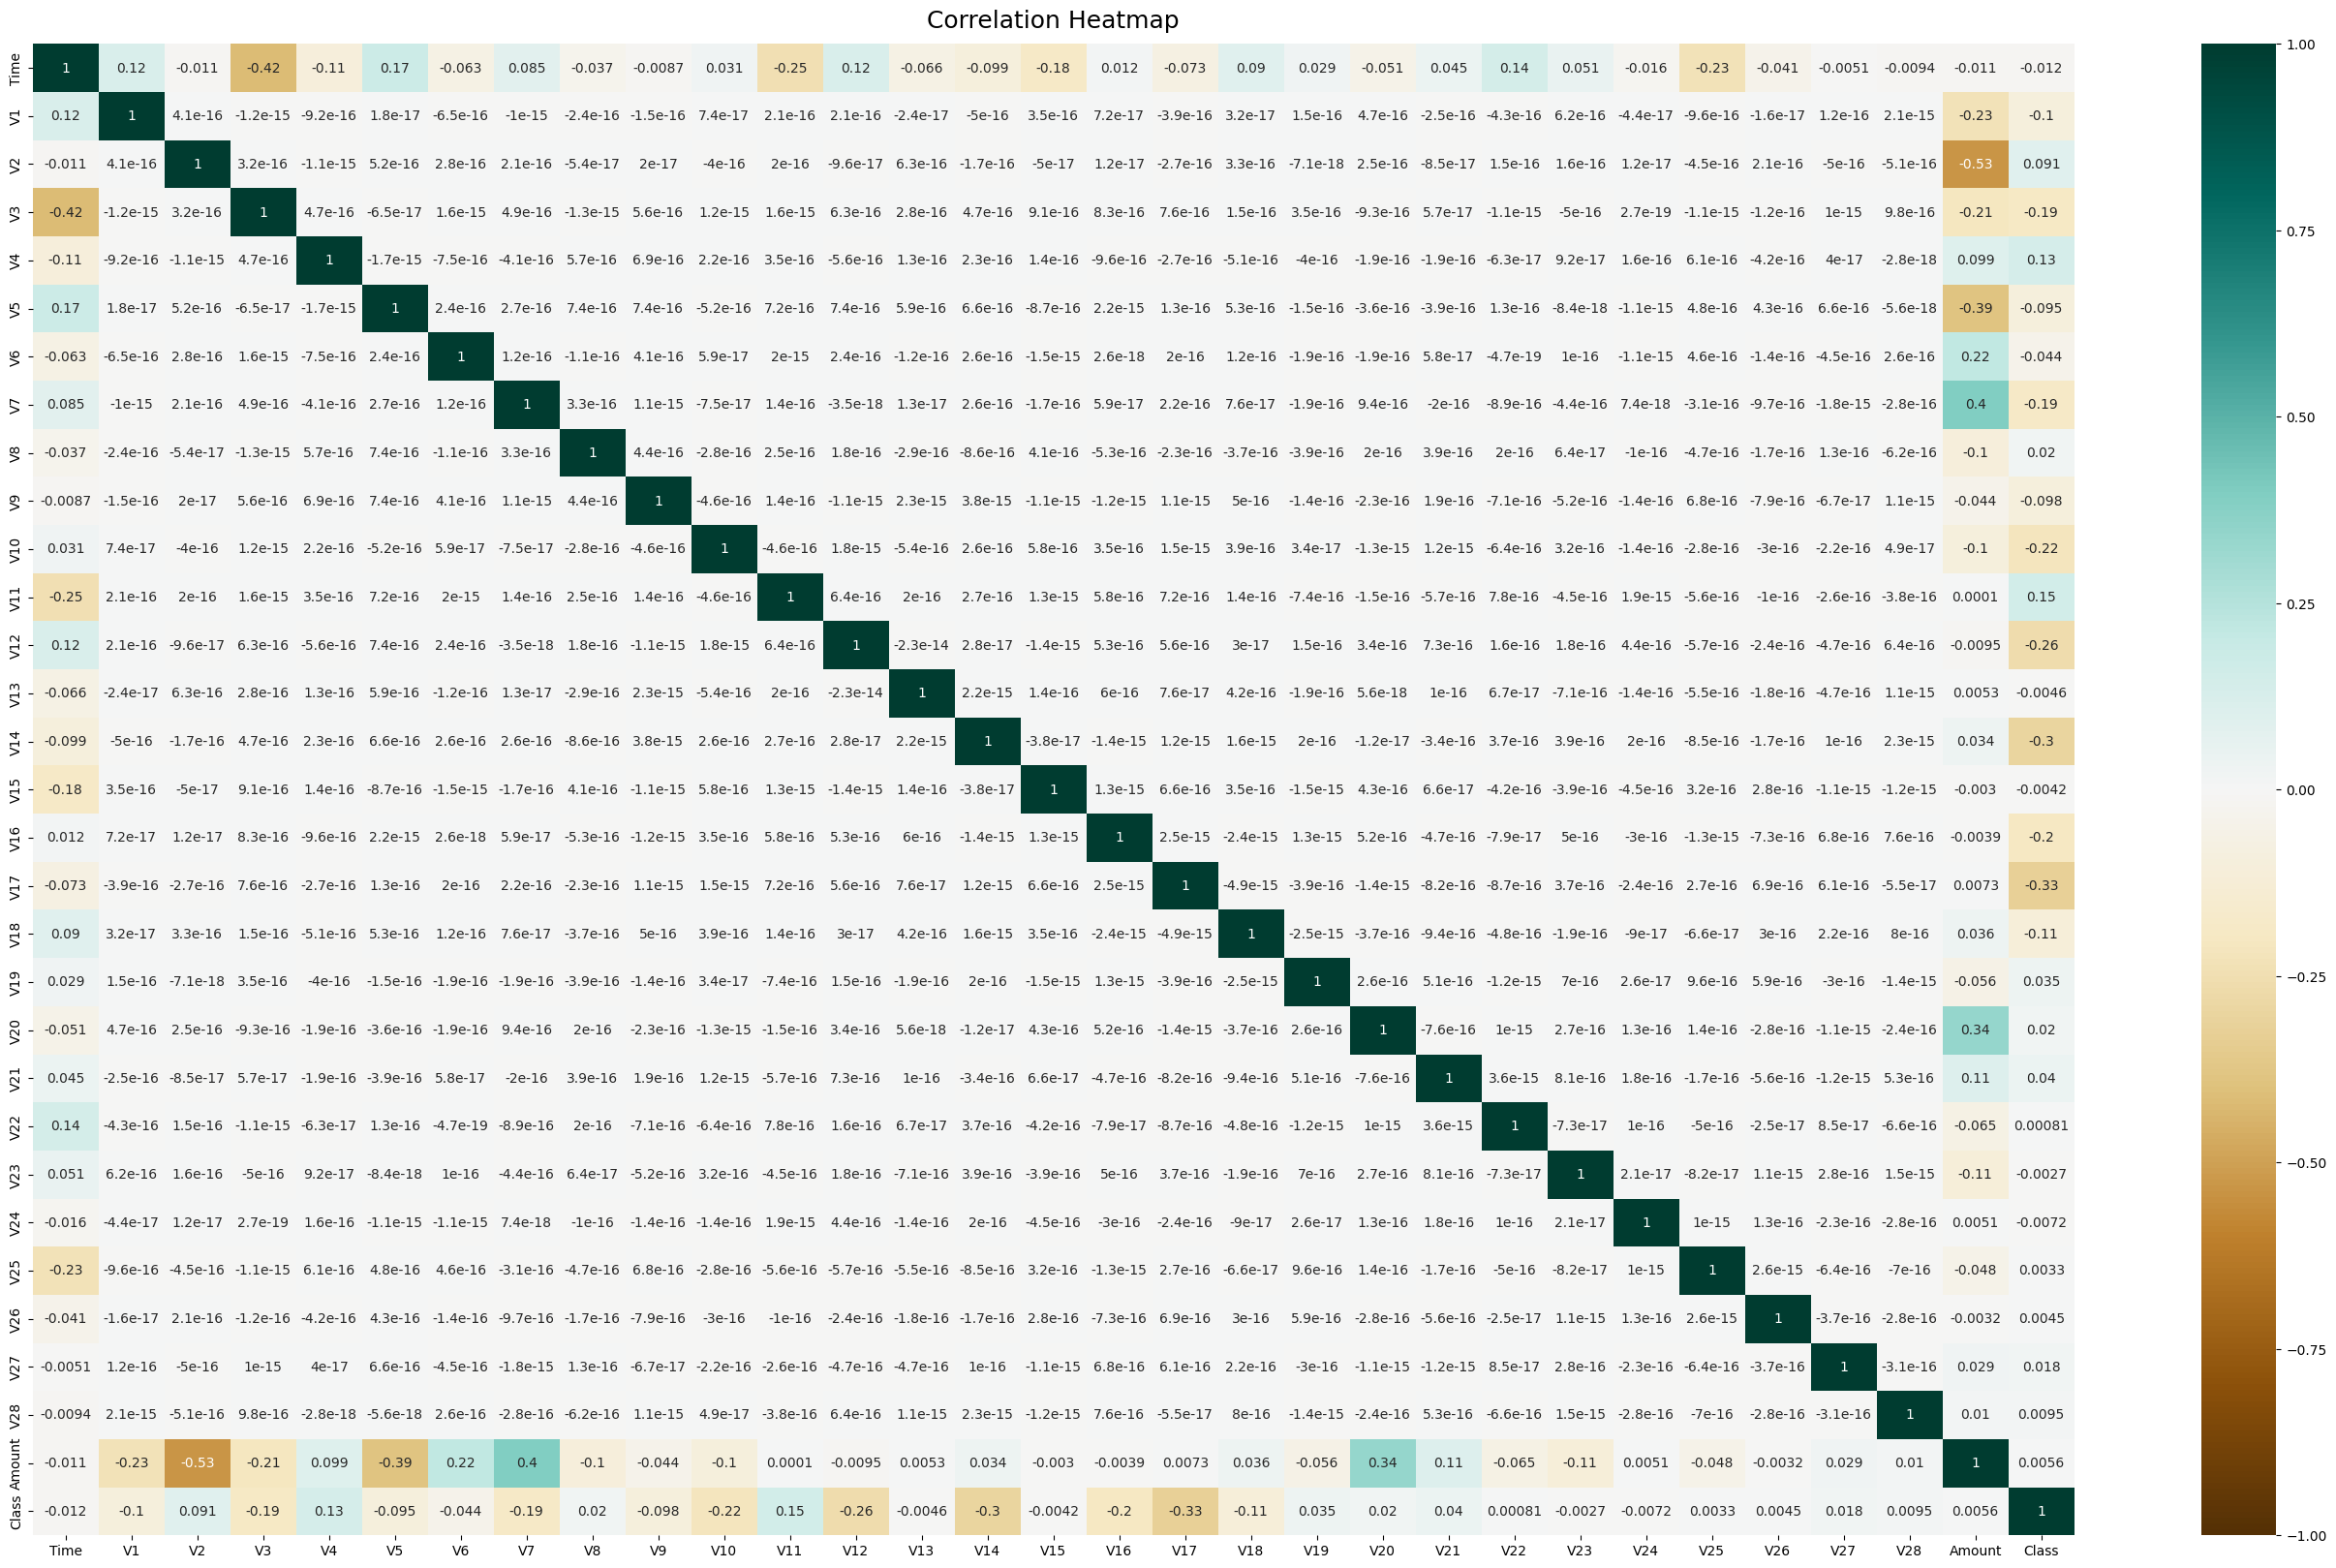

In [13]:
#Lets make as correlation heatmap to see which features relate most strongly or negativelt to one another.

import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(34, 20))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

From our correlation heatmap we can see:
1. Class has some strong negative and positive correlations with lots of the V? columns.
2. Amount has some strong negative and positive correlations with lots of the V? columns.
3. Time has some strong negative and positive correlations with lots of the V? columns.
4. The V? columns dont really have any correlation to one another.

<Axes: xlabel='Amount', ylabel='V2'>

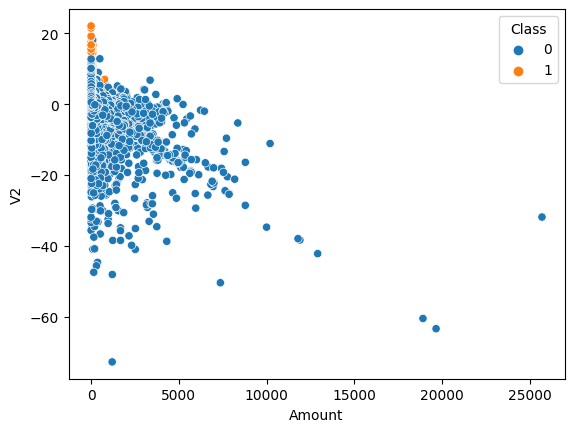

In [14]:
# Lets take a look at these correlation in some scatter plots.

sns.scatterplot(data=data, x="Amount", y="V2", hue="Class")

<Axes: xlabel='Time', ylabel='V3'>

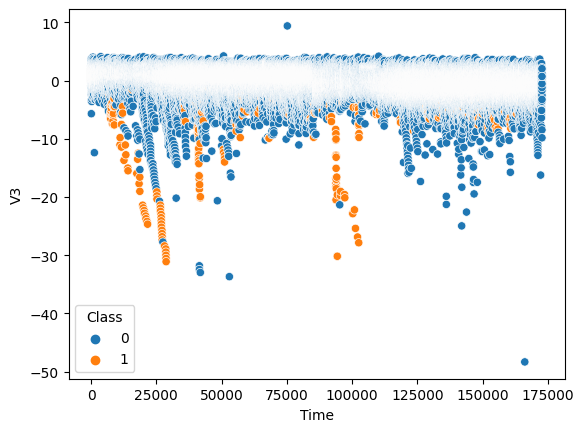

In [15]:
sns.scatterplot(data=data, x="Time", y="V3", hue="Class")

---
# **Visualising by Time & Amount**
## In these scatter plots, we will:
- Create a Scatter Plot
- Loop the first 9 columns
- Add Hue to `Class` to differentiate fraud

---
## **`Amount` Scatter Plots**

Within these scatter plots, we will visualise where fraud happens based on the Amount of the transaction.

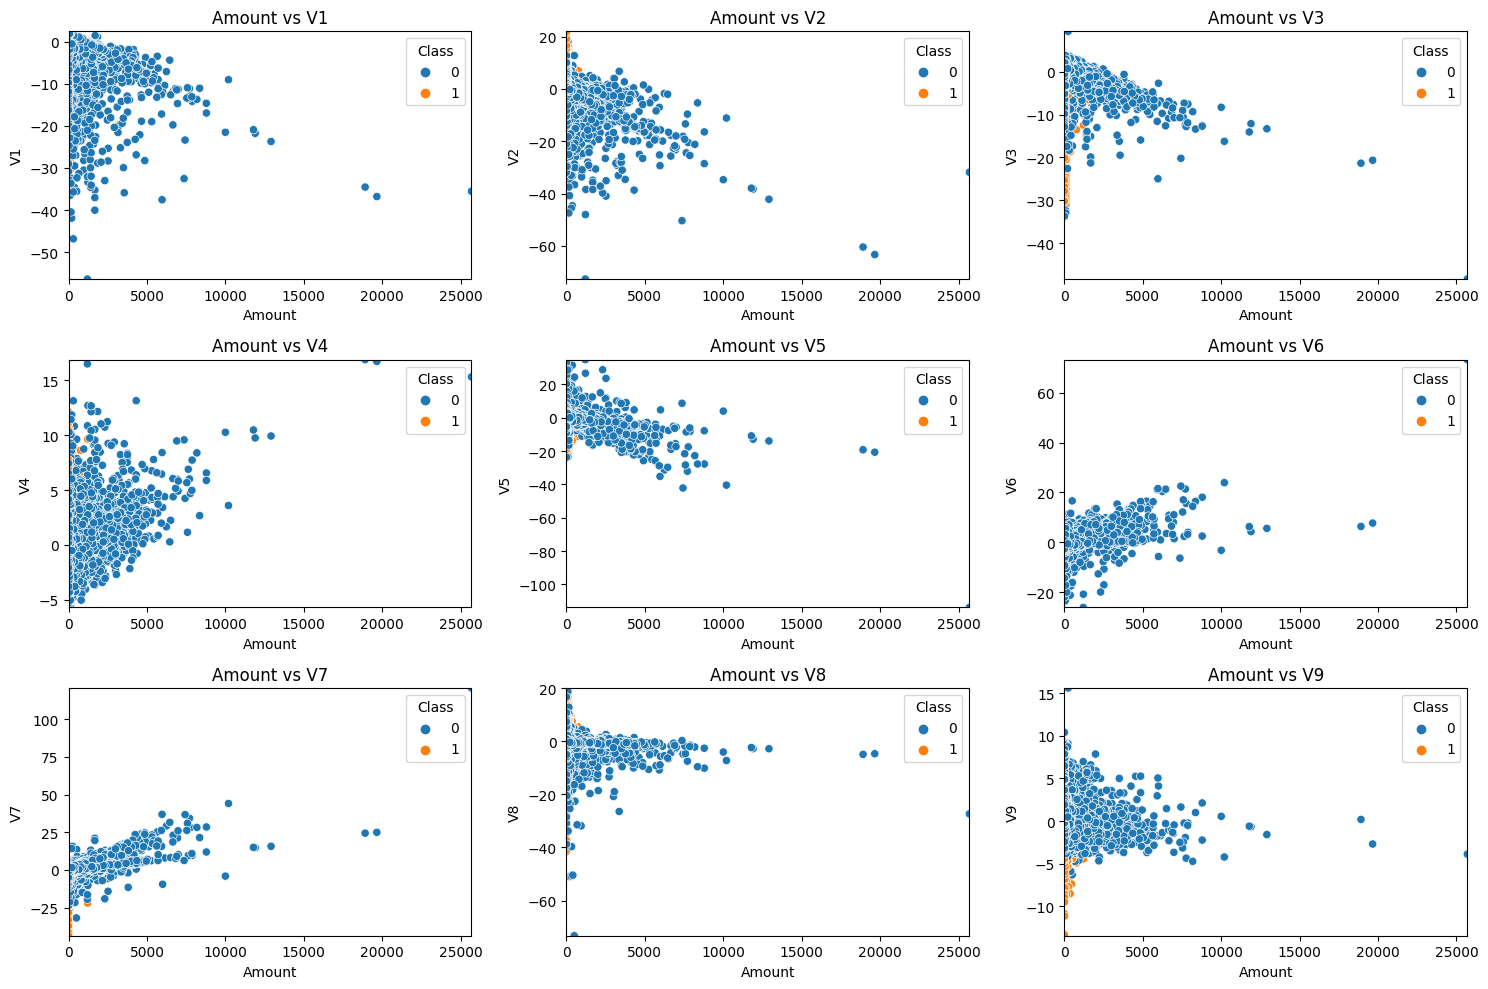

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
# Select a subset of columns to plot
columns_to_plot = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9']  # Adjust this list as needed

# Set the number of rows and columns for the subplot grid
n_rows = 3
n_cols = 3  # Adjust these numbers based on how many plots you want

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))  # Adjust the figure size as needed
axes = axes.flatten()

# Loop through the selected columns and create scatter plots
for i, col in enumerate(columns_to_plot):
    if i < len(axes):
        sns.scatterplot(data=data, x="Amount", y=col, hue="Class", ax=axes[i])
        axes[i].set_title(f'Amount vs {col}')
        axes[i].set_xlim(min(data["Amount"]), max(data["Amount"]))
        axes[i].set_ylim(min(data[col]), max(data[col]))

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


---
## **`Time` Scatter Plots:**

Within these scatter plots, we will visualise where fraud happens based on the Time of the transaction.

<ipython-input-17-56b6f2e6ee67>:27: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


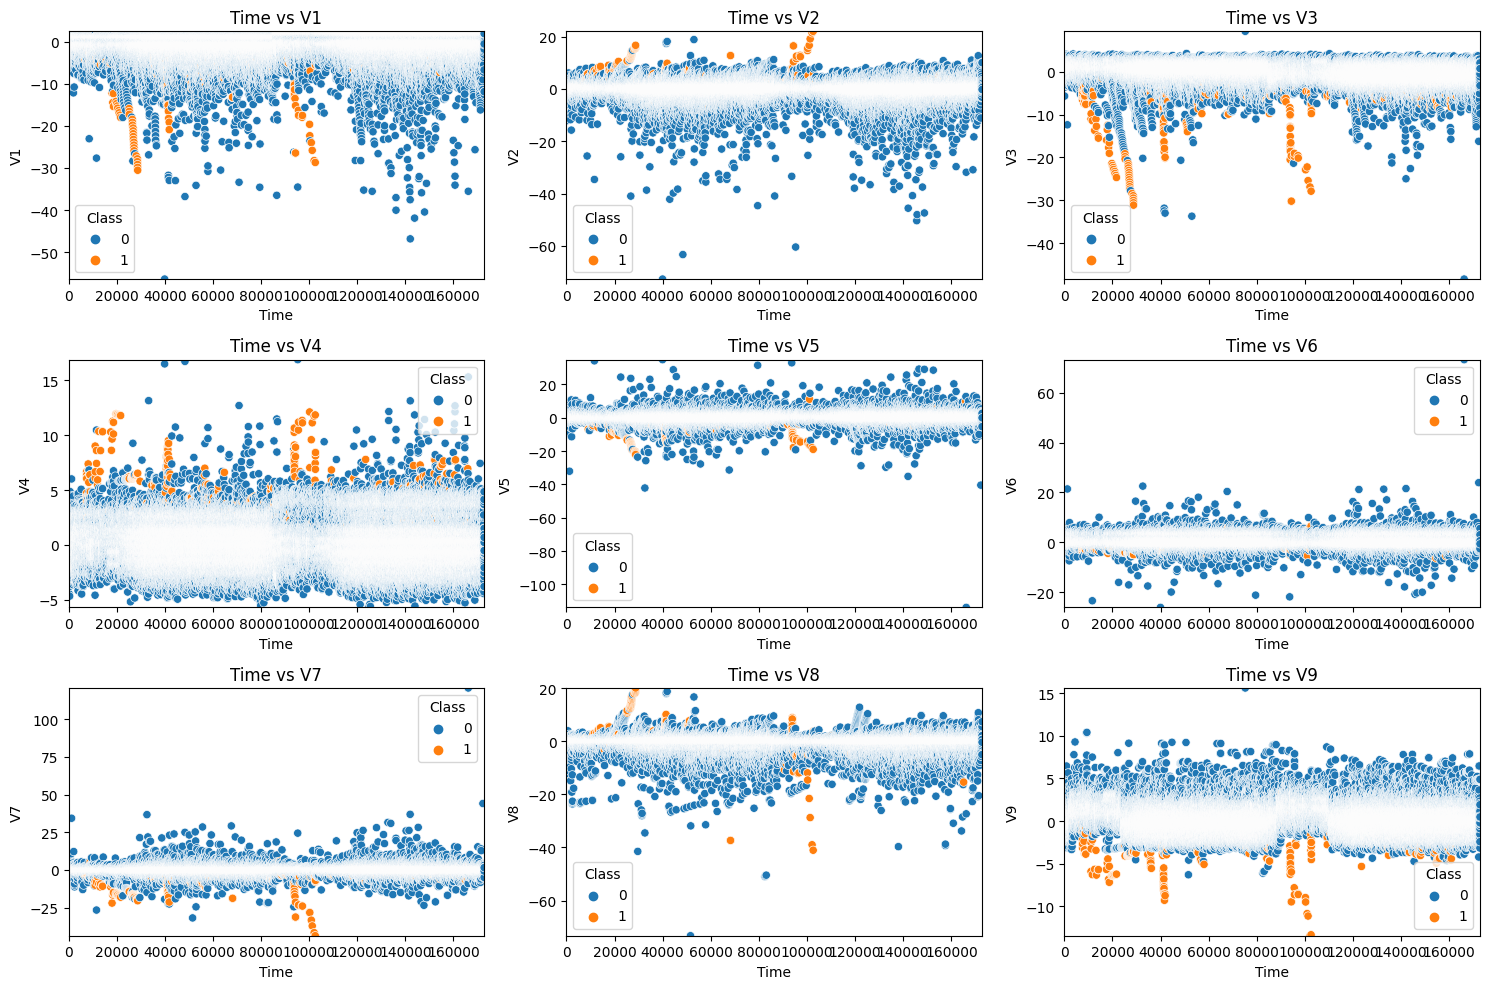

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
# Select a subset of columns to plot
columns_to_plot = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9']  # Adjust this list as needed

# Set the number of rows and columns for the subplot grid
n_rows = 3
n_cols = 3  # Adjust these numbers based on how many plots you want

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))  # Adjust the figure size as needed
axes = axes.flatten()

# Loop through the selected columns and create scatter plots
for i, col in enumerate(columns_to_plot):
    if i < len(axes):
        sns.scatterplot(data=data, x="Time", y=col, hue="Class", ax=axes[i])
        axes[i].set_title(f'Time vs {col}')
        axes[i].set_xlim(min(data["Time"]), max(data["Time"]))
        axes[i].set_ylim(min(data[col]), max(data[col]))

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


---
## **`Time` Scatter Plots (Fraudulent Cases Only):**

Below we weill create scatterplots with all the V Columns Vs. Time. We will show only Fraudulent transactions so we can see specific fraudulent patterns.

### Columns V1-V9 Vs Time

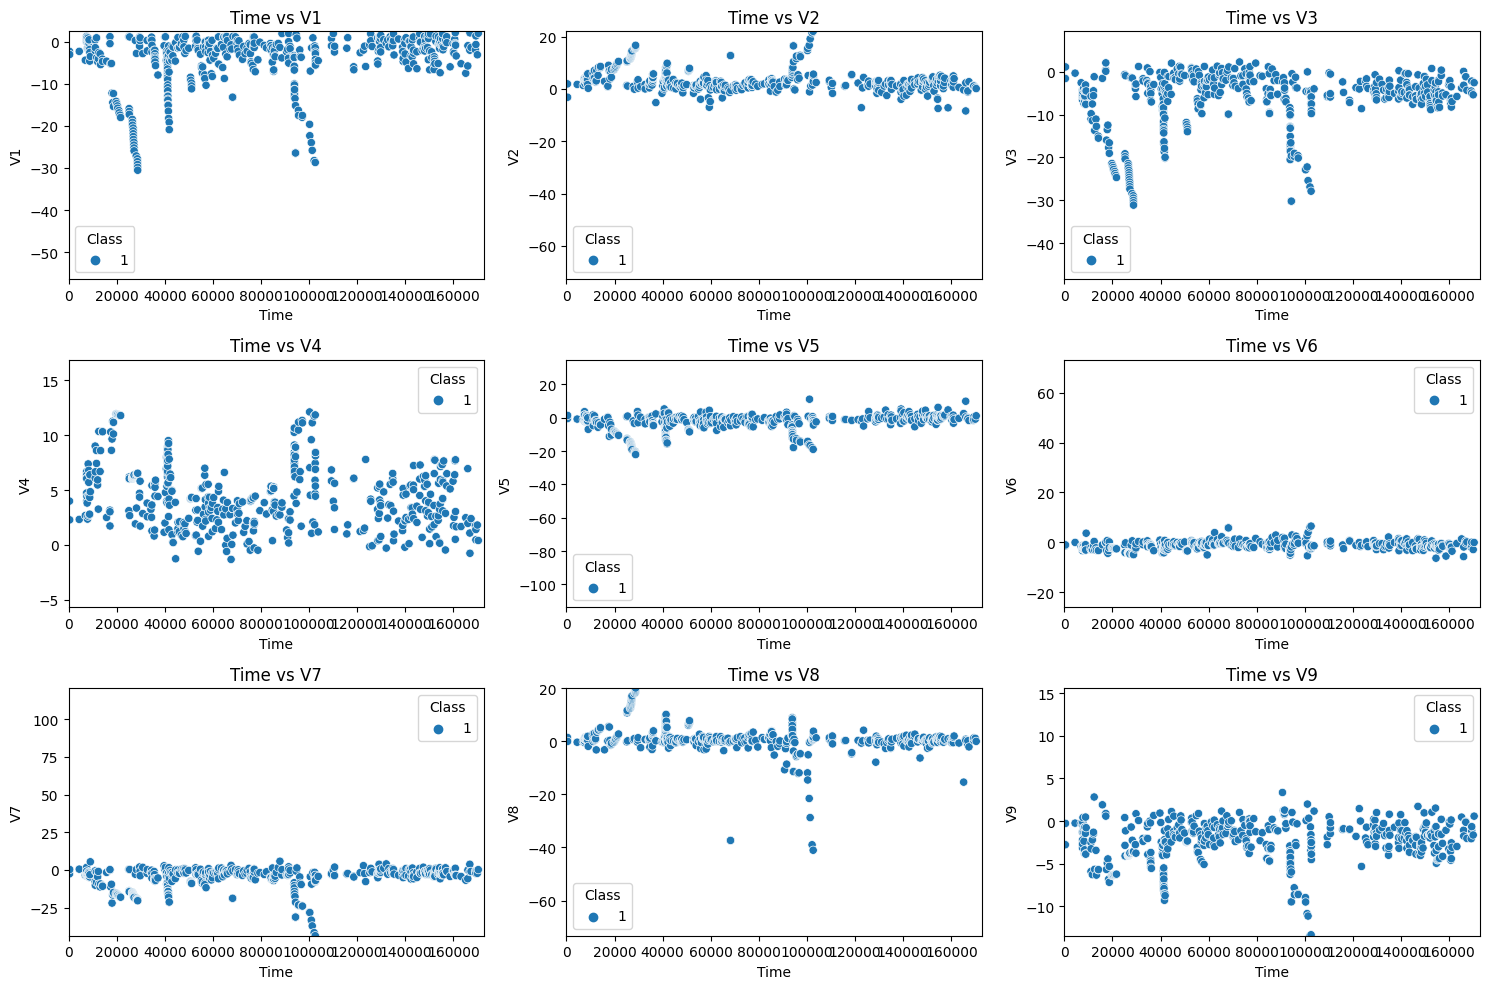

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

columns_to_plot = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9']  # Adjust this list as needed

# Set the number of rows and columns for the subplot grid
n_rows = 3
n_cols = 3  # Adjust these numbers based on how many plots you want

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))  # Adjust the figure size as needed
axes = axes.flatten()

# Loop through the selected columns and create scatter plots
for i, col in enumerate(columns_to_plot):
    if i < len(axes):
        sns.scatterplot(data=data[data["Class"] == 1], x="Time", y=col, hue="Class", ax=axes[i])
        axes[i].set_title(f'Time vs {col}')
        axes[i].set_xlim(min(data["Time"]), max(data["Time"]))
        axes[i].set_ylim(min(data[col]), max(data[col]))

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

### Columns V10-V18 Vs Time

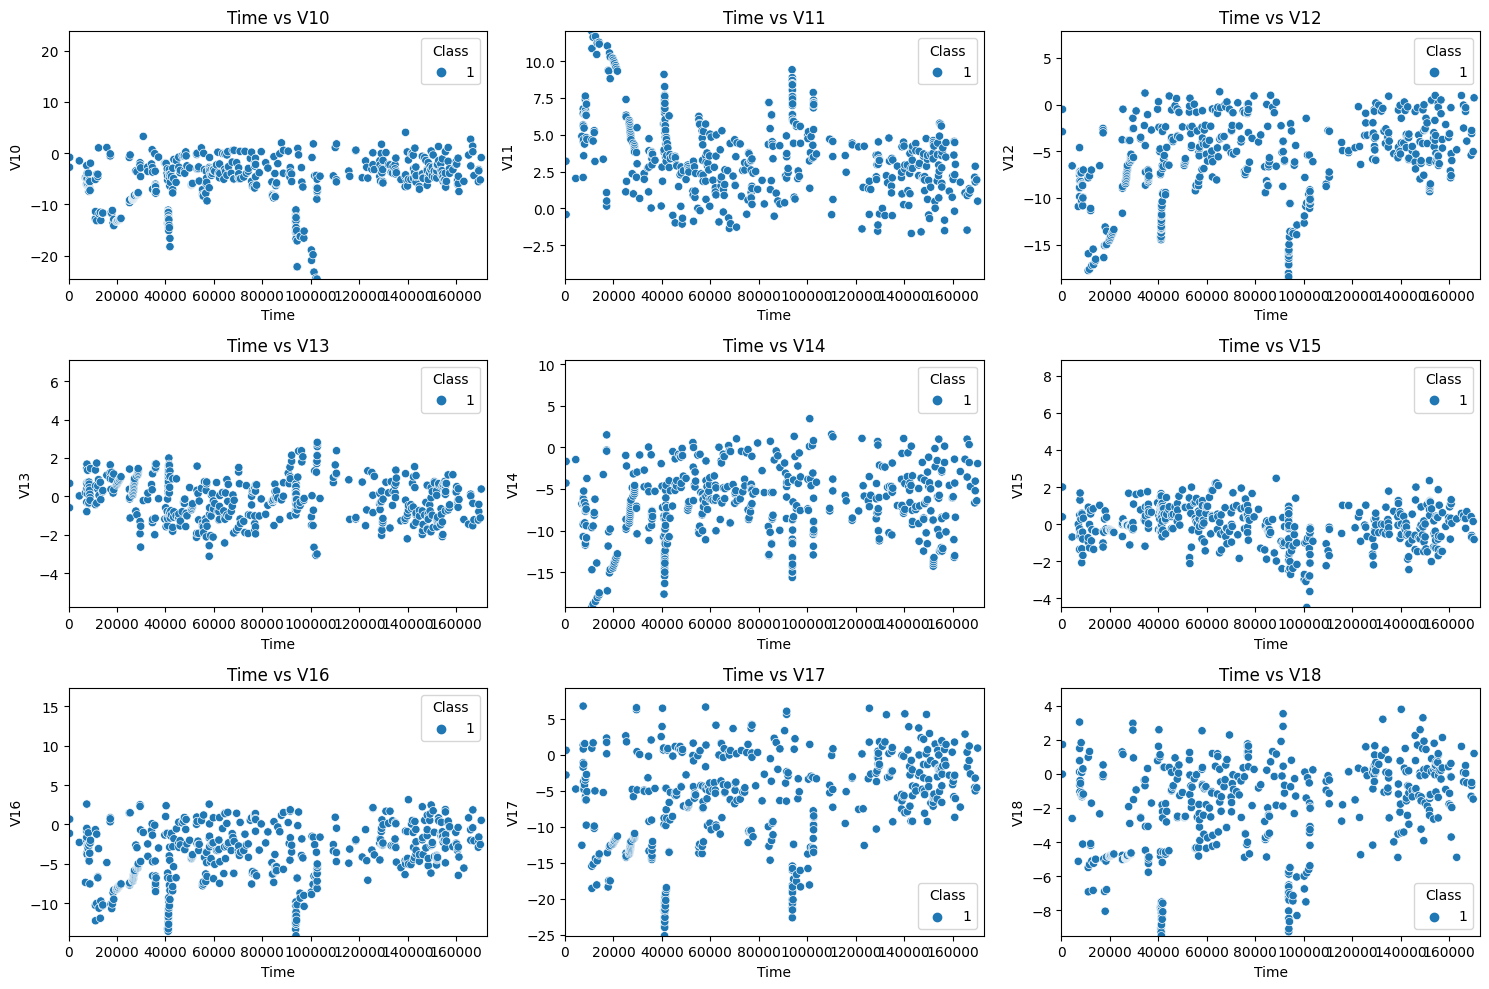

In [36]:
columns_to_plot_2 = ['V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18']  # Adjust this list as needed

# Set the number of rows and columns for the subplot grid
n_rows = 3
n_cols = 3  # Adjust these numbers based on how many plots you want

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))  # Adjust the figure size as needed
axes = axes.flatten()

# Loop through the selected columns and create scatter plots
for i, col in enumerate(columns_to_plot_2):
    if i < len(axes):
        sns.scatterplot(data=data[data["Class"] == 1], x="Time", y=col, hue="Class", ax=axes[i])
        axes[i].set_title(f'Time vs {col}')
        axes[i].set_xlim(min(data["Time"]), max(data["Time"]))
        axes[i].set_ylim(min(data[col]), max(data[col]))

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

### Columns V19-V27 Vs Time

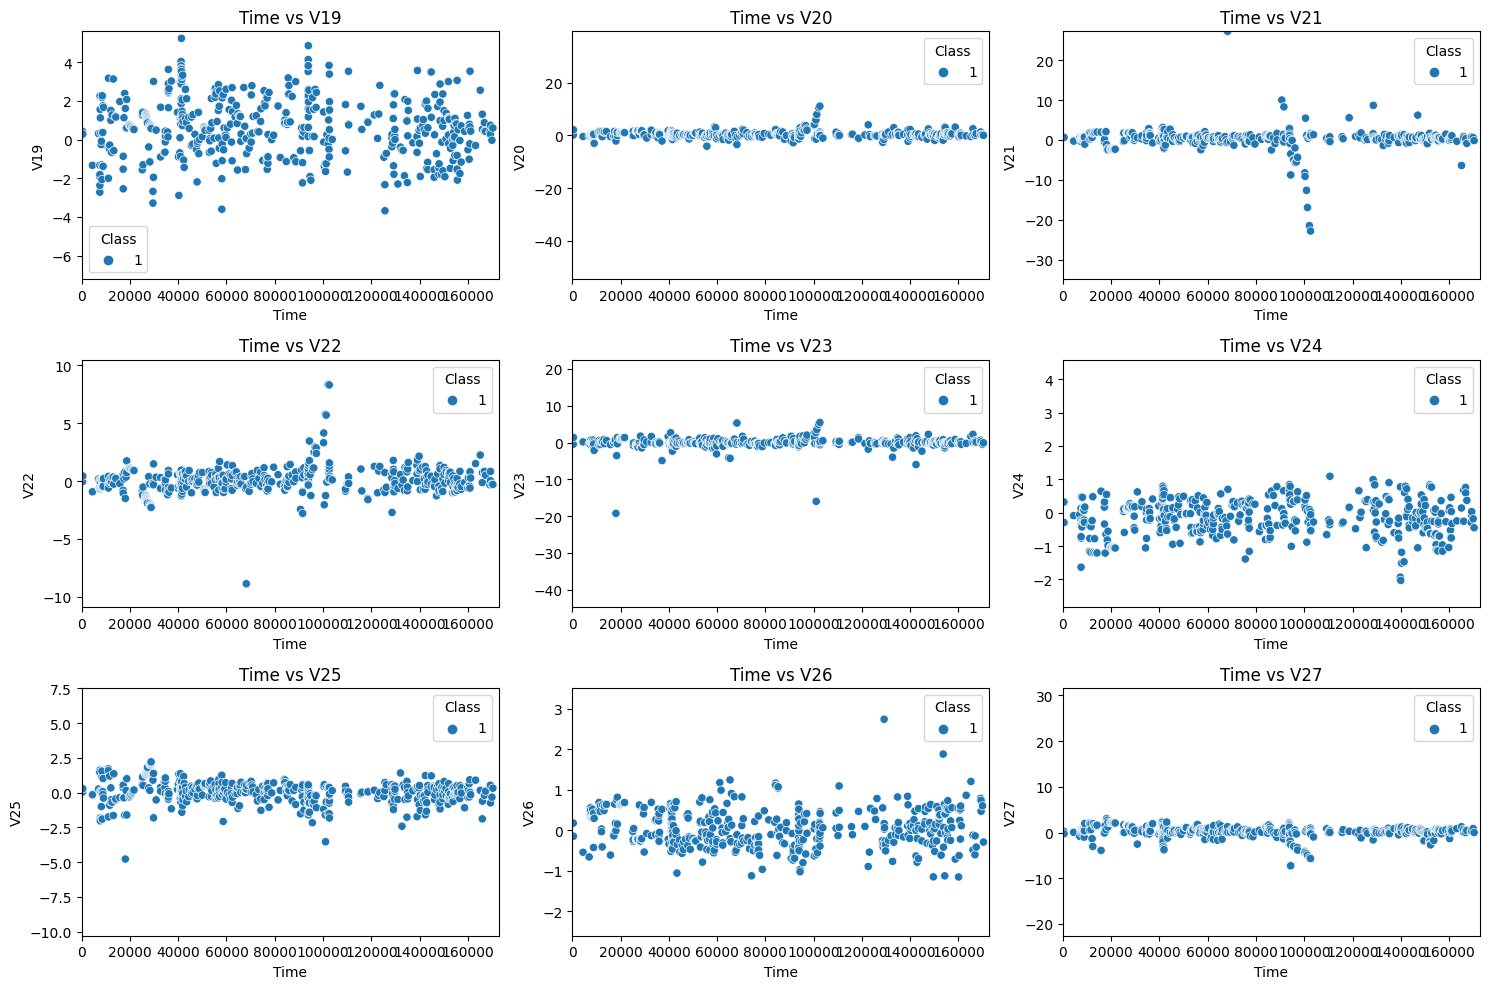

In [37]:
columns_to_plot_3 = ['V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27']  # Adjust this list as needed

# Set the number of rows and columns for the subplot grid
n_rows = 3
n_cols = 3  # Adjust these numbers based on how many plots you want

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))  # Adjust the figure size as needed
axes = axes.flatten()

# Loop through the selected columns and create scatter plots
for i, col in enumerate(columns_to_plot_3):
    if i < len(axes):
        sns.scatterplot(data=data[data["Class"] == 1], x="Time", y=col, hue="Class", ax=axes[i])
        axes[i].set_title(f'Time vs {col}')
        axes[i].set_xlim(min(data["Time"]), max(data["Time"]))
        axes[i].set_ylim(min(data[col]), max(data[col]))

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

---
# **Building our First Model**
For the sake of simplisity and inital data analysis,

We're going to use a **Logistic Regression** model

In [18]:
# Define Features and Labels
y = data['Class']
X = data.drop(columns="Class")

---
## **Logistic Regression**

In [30]:
# Split our Features and Labels in to Train Set and Test Set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

In [32]:
# Here we will create a validation set of the data aswell.
X_validate, X_test, y_validate, y_test = train_test_split(X_test, y_test, test_size=0.5,random_state=42)

In [33]:
X_test

Time        V1        V2        V3        V4        V5        V6  \
55203    46834.0 -0.626770  0.917254  1.629186 -0.140698  1.040283  0.444661   
215637  140155.0  2.039107 -0.167212 -1.225959  0.205371  0.080907 -0.591934   
161126  113905.0  1.933242 -0.936261 -1.237241 -0.278720 -0.681080 -0.806029   
53632    46079.0  1.167643 -0.336057  0.649466  0.092566 -0.913074 -0.502738   
67607    52618.0 -1.523482  0.821014  1.671966 -0.297101  0.044031 -0.106276   
...          ...       ...       ...       ...       ...       ...       ...   
49676    44160.0 -0.037945 -0.467381  1.652549 -1.332761 -1.219255 -0.660119   
75835    56275.0  0.869526 -0.906064  0.937006  0.326969 -1.176057  0.136575   
185151  126539.0  2.095483 -1.098641 -0.352026 -0.927911 -1.055540  0.050604   
273565  165619.0  2.008167 -0.332701 -0.368816  0.318871 -0.741505 -0.786710   
74555    55639.0  0.977152  0.036543  0.040358  0.746834  0.512680  1.565635   

              V7        V8        V9  ...       V20       V21       V22  \
55203   1.087762 -0.062544 -0.428361  ... -0.038680 -0.158631 -0.199355   
215637  0.012609 -0.098385  0.408907  ... -0.250518 -0.265906 -0.690935   
161126 -0.266286 -0.227486 -0.545085  ... -0.470659  0.066212  0.632341   
53632  -0.496951  0.152469  0.757696  ... -0.199953 -0.179756 -0.676341   
67607   0.212097  0.597320 -0.631150  ... -0.241864 -0.029955 -0.189077   
...          ...       ...       ...  ...       ...       ...       ...   
49676   0.152442 -0.287167 -2.497272  ... -0.070530 -0.496851 -1.082749   
75835  -0.534117  0.160407  1.203997  ...  0.196810 -0.114145 -0.390900   
185151 -1.282946  0.107145 -0.027578  ...  0.070713  0.492172  1.505790   
273565 -0.521232 -0.032496  1.504815  ... -0.313813 -0.141237 -0.319265   
74555  -0.488901  0.621675  0.243480  ... -0.176659 -0.005809  0.369938   

             V23       V24       V25       V26       V27       V28  Amount  
55203  -0.606876 -0.839032  0.848598 -0.403166 -0.127971 -0.185628    4.80  
215637  0.293645 -0.484409 -0.312740  0.210634 -0.076174 -0.076244    1.29  
161126 -0.045994  0.028921  0.123604 -0.047706 -0.005599 -0.047874   97.00  
53632   0.192565  0.051593 -0.157112  0.823604 -0.067120  0.010579   30.80  
67607  -0.295125  0.278360  0.330952  0.175481 -0.201636 -0.092131   14.36  
...          ...       ...       ...       ...       ...       ...     ...  
49676   0.432569  0.488126 -0.914337 -0.599435 -0.013731 -0.068087   76.80  
75835  -0.024600  0.165165  0.002207  0.955804 -0.047337  0.037638  163.12  
185151  0.090174  0.840658 -0.103720 -0.035011  0.018256 -0.045854   20.86  
273565  0.348996 -0.200349 -0.385367 -0.913209  0.051918 -0.030818    1.00  
74555   0.016589 -1.067088  0.219240  0.521558  0.072569  0.018520    9.34  

[46994 rows x 30 columns]

In [34]:
X_validate

Time        V1        V2        V3        V4        V5        V6  \
171143  120515.0  2.022087  0.475573 -2.468656  1.421800  1.138716 -0.782938   
240883  150792.0 -0.212130  0.867433  0.098859 -0.645057  0.356428 -1.132711   
243926  152133.0 -1.191692  0.313145  0.213221 -0.995989  0.870776 -0.491996   
163734  116172.0  1.148684 -3.492960 -0.703299 -1.414105 -2.214114  0.713512   
26980    34332.0 -0.984903  0.943845  0.875304 -0.912799  0.132185 -1.450106   
...          ...       ...       ...       ...       ...       ...       ...   
272231  164977.0  1.779991 -1.008402 -1.319904  0.631021 -0.435614 -0.268094   
159428  112471.0 -0.877814  1.515532 -0.477766 -0.685152  0.389452 -0.998759   
81630    59023.0  0.159162  0.573922  1.820812  1.092696 -0.404856  0.703787   
167170  118526.0 -2.199265 -0.985494  2.504573 -0.022740 -1.017166  0.484015   
247173  153488.0 -0.228425  0.788881 -1.557112 -0.593255  1.240094  0.750002   

              V7        V8        V9  ...       V20       V21       V22  \
171143  0.686035 -0.318901  0.142451  ... -0.184497 -0.049698  0.032441   
240883  0.854994 -0.098580  0.387799  ...  0.004820 -0.315727 -0.745553   
243926  1.770058 -0.343247 -2.453597  ... -0.533099 -0.191597 -0.230044   
163734 -1.384118  0.129956 -0.954553  ...  0.807114  0.450765  0.425614   
26980   0.752978  0.155363 -0.873645  ... -0.073273 -0.265140 -1.097763   
...          ...       ...       ...  ...       ...       ...       ...   
272231 -0.148774 -0.141189 -0.770485  ... -0.362264 -0.061995  0.091311   
159428  0.857116 -0.071902  0.561251  ...  0.429182  0.297098  1.362516   
81630  -0.539478 -0.686231  0.307576  ... -0.027583  0.645634 -0.353304   
167170 -0.802496  0.932077  1.344526  ...  0.621589  0.239363  0.519073   
247173  0.945680  0.558663 -0.470461  ... -0.069123  0.034681 -0.020756   

             V23       V24       V25       V26       V27       V28  Amount  
171143 -0.042262  0.291319  0.516483 -0.504959 -0.004376 -0.022587   22.94  
240883  0.085928 -0.161760 -0.466125  0.157053  0.337889  0.165317    1.79  
243926 -0.426450 -0.510898  1.284650 -0.441740 -0.105991  0.059815  150.36  
163734 -0.248848  0.204419 -0.718875 -0.197398 -0.043131  0.064402  577.95  
26980   0.123156  0.411262 -0.389139  0.435833 -0.133018  0.008875   20.48  
...          ...       ...       ...       ...       ...       ...     ...  
272231 -0.086863 -0.433058  0.114865 -0.471388  0.004635 -0.031941  167.91  
159428 -0.107486  0.032168 -0.663283 -0.218673  0.946464  0.547896    4.66  
81630  -0.328910 -0.418654  1.148727 -0.162936  0.203333  0.196824    9.99  
167170 -0.066883 -0.014754  0.584463  0.872440  0.151616 -0.081790  164.25  
247173  0.491251 -0.649669 -0.976144  0.229229 -0.041400  0.054313  117.12  

[46993 rows x 30 columns]

In [40]:
# Define our model (Logistic Regression)

from sklearn.linear_model import LogisticRegression

pradeesh_log_reg = LogisticRegression(random_state=0, max_iter=1000).fit(X_train, y_train)

---
### Train Set Score

In [41]:
pradeesh_log_reg.score(X_train, y_train)

0.9991824756314852

---
### Validation Test Score


In [42]:
pradeesh_log_reg.score(X_validate, y_validate)

0.9990636903368587

---
### Test Set Score

In [43]:
pradeesh_log_reg.score(X_test, y_test)

0.9991062688853897

Our code to save/load model to be used later



In [45]:
import joblib

# Your AutoML model (replace this with your actual model)
pradeesh_log_reg = pradeesh_log_reg

# Specify the file path where you want to save the model
model_filename = "pradeesh_log_reg.joblib"

# Save the model using joblib
joblib.dump(pradeesh_log_reg, model_filename)

print(f"Model saved to {model_filename}")

Model saved to pradeesh_log_reg.joblib


In [25]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.9992977826956633


---
# AutoML Model Building

In [26]:
from flaml import AutoML

#Uncomment below to run AutoML model (4 hour run time).

#automl = AutoML()
#automl.fit(X_train, y_train, task="classification")

In [27]:
import joblib

# Your AutoML model (replace this with your actual model)
automl_model = automl

# Specify the file path where you want to save the model
model_filename = "automl_XGBC.joblib"

# Save the model using joblib
joblib.dump(automl_model, model_filename)

print(f"Model saved to {model_filename}")

NameError: ignored

___
# Using SMOTE to create data.